<a href="https://colab.research.google.com/github/sarathbabu123/MachineLearningalgorithms/blob/main/HousingPriceRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
feature_columns = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/original_housing_train_1726115957.csv")
target_columns = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/original_housing_train_tgt_1726116437.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing

1. Merging the datasets

##Basic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load and merge datasets
feature_columns = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/original_housing_train_1726115957.csv")
target_columns = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/original_housing_train_tgt_1726116437.csv")

# Rename the unnamed first column in both DataFrames to 'serial_number'
feature_columns.rename(columns={feature_columns.columns[0]: 'serial_number'}, inplace=True)
target_columns.rename(columns={target_columns.columns[0]: 'serial_number'}, inplace=True)

# Merge the feature and target DataFrames on 'serial_number'
df = pd.merge(feature_columns, target_columns, on='serial_number')

Encoded Correlation Matrix:
                     serial_number  longitude  latitude  housing_median_age  \
serial_number            1.000000  -0.116634  0.084968           -0.181150   
longitude               -0.116634   1.000000 -0.925226           -0.108258   
latitude                 0.084968  -0.925226  1.000000            0.011465   
housing_median_age      -0.181150  -0.108258  0.011465            1.000000   
total_rooms              0.060786   0.045929 -0.037830           -0.361025   
total_bedrooms           0.029259   0.071382 -0.068823           -0.320389   
population               0.021884   0.101286 -0.110397           -0.292945   
households               0.026857   0.057230 -0.072933           -0.302160   
median_income            0.077167  -0.014780 -0.079249           -0.124202   
median_house_value       0.074562  -0.044945 -0.144359            0.105424   

                    total_rooms  total_bedrooms  population  households  \
serial_number          0.060786      

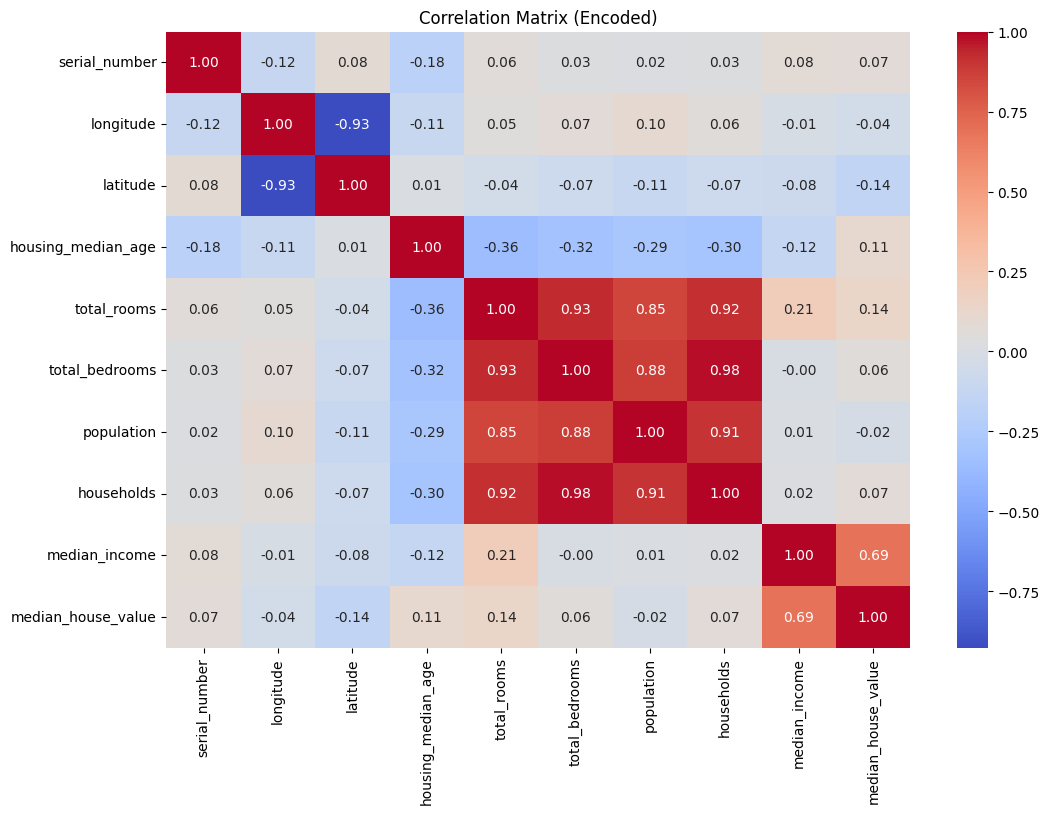

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to one-hot encoded format
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Select only numeric columns from the encoded DataFrame
numeric_df_encoded = df_encoded.select_dtypes(include=[float, int])

# Calculate and visualize the correlation matrix
correlation_matrix_encoded = numeric_df_encoded.corr()

print("Encoded Correlation Matrix:\n", correlation_matrix_encoded)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Encoded)')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load and merge datasets
feature_columns = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/original_housing_train_1726115957.csv")
target_columns = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/original_housing_train_tgt_1726116437.csv")

# Rename the unnamed first column in both DataFrames to 'serial_number'
feature_columns.rename(columns={feature_columns.columns[0]: 'serial_number'}, inplace=True)
target_columns.rename(columns={target_columns.columns[0]: 'serial_number'}, inplace=True)

# Merge the feature and target DataFrames on 'serial_number'
df = pd.merge(feature_columns, target_columns, on='serial_number')

# Drop rows with missing values
df.dropna(inplace=True)

# Define feature and target columns
feature_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
target_column = 'median_house_value'

# Split the dataset into features and target
X = df[feature_columns]
y = df[target_column]

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                                    'total_bedrooms', 'population', 'households', 'median_income']),
        ('cat', OneHotEncoder(drop='first'), ['ocean_proximity'])
    ])

# Create a pipeline that first applies the preprocessing and then fits a linear model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("Basic Regression Model")
print("Test MSE:", test_mse)
print("Test R²:", test_r2)


Basic Regression Model
Test MSE: 4713717105.011192
Test R²: 0.6424907160980438


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load and merge datasets
feature_columns = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/original_housing_train_1726115957.csv")
target_columns = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/original_housing_train_tgt_1726116437.csv")

feature_columns.rename(columns={feature_columns.columns[0]: 'serial_number'}, inplace=True)
target_columns.rename(columns={target_columns.columns[0]: 'serial_number'}, inplace=True)

df = pd.merge(feature_columns, target_columns, on='serial_number')

df_dropna = df.dropna()
df_impute = df.copy()

# Impute missing values in df_impute
num_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
cat_cols = ['ocean_proximity']

# Define imputers
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers
df_impute[num_cols] = num_imputer.fit_transform(df_impute[num_cols])
df_impute[cat_cols] = cat_imputer.fit_transform(df_impute[cat_cols])

# Define a function to prepare data, train models, and evaluate performance
def evaluate_model(df, model_name, model):
    # Define feature and target columns
    feature_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                        'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
    target_column = 'median_house_value'

    # Split the dataset into features and target
    X = df[feature_columns]
    y = df[target_column]

    # Define preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                                        'total_bedrooms', 'population', 'households', 'median_income']),
            ('cat', OneHotEncoder(drop='first'), ['ocean_proximity'])
        ])

    # Create a pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Model")
    print("Test MSE:", test_mse)
    print("Test R²:", test_r2)
    print()

# Evaluate models on the DataFrame with dropped missing values
print("Results for DataFrame with Missing Values Dropped:")
evaluate_model(df_dropna, 'Linear Regression', LinearRegression())
evaluate_model(df_dropna, 'Ridge Regression', Ridge(alpha=1.0))
evaluate_model(df_dropna, 'Lasso Regression', Lasso(alpha=10.0))

# Evaluate models on the DataFrame with imputed missing values
print("Results for DataFrame with Missing Values Imputed:")
evaluate_model(df_impute, 'Linear Regression', LinearRegression())
evaluate_model(df_impute, 'Ridge Regression', Ridge(alpha=1.0))
evaluate_model(df_impute, 'Lasso Regression', Lasso(alpha=10.0))


Results for DataFrame with Missing Values Dropped:
Linear Regression Model
Test MSE: 4713717105.011192
Test R²: 0.6424907160980438

Ridge Regression Model
Test MSE: 4714418615.269652
Test R²: 0.6424375104379321

Lasso Regression Model
Test MSE: 4715662168.12961
Test R²: 0.6423431938545323

Results for DataFrame with Missing Values Imputed:
Linear Regression Model
Test MSE: 4576062926.34068
Test R²: 0.6572114443096556

Ridge Regression Model
Test MSE: 4576185411.256267
Test R²: 0.6572022690802098

Lasso Regression Model
Test MSE: 4576484478.3876
Test R²: 0.657179866243611



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# 1. Handling Missing Values (Imputation)
# Impute missing numerical values using the median strategy
num_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# 2. Encoding Categorical Variables (One-Hot Encoding)
# Apply One-Hot Encoding to 'ocean_proximity' and drop the original column
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# 3. Feature Scaling (Standardization)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 4. Train-Test-Validation Split
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

# First, split the data into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, further split the training data into training and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Check the sizes of the splits to ensure everything is as expected
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

# Check the processed data
print(X_train.head())


Training set size: (9906, 13)
Validation set size: (3303, 13)
Test set size: (3303, 13)
       serial_number  longitude  latitude  housing_median_age  total_rooms  \
8735            3434    -118.43     34.25            0.500165    -0.539839   
7069            7666    -118.08     33.93            0.818169    -0.809867   
12757          12113    -117.24     33.95           -1.407859     1.834386   
1165            5235    -118.23     33.94            0.500165    -0.703784   
16056           6409    -118.02     34.12            0.659167    -0.171076   

       total_bedrooms  population  households  median_income  \
8735        -0.477307    0.184933   -0.502788      -0.500378   
7069        -0.887613   -0.657965   -0.854985      -0.079126   
12757        1.401460    2.016937    1.549947       0.490505   
1165        -0.640470   -0.071371   -0.615806      -0.903588   
16056       -0.417321   -0.379641   -0.442336       1.215358   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
8

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

# Initialize model
model = Ridge(alpha=1.0)
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND'],
      dtype='object')


##Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the hyperparameter grid to search
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
}

# Ridge Regression
ridge = Ridge()
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid,
                                  scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

best_alpha_ridge = grid_search_ridge.best_params_['alpha']
best_ridge = Ridge(alpha=best_alpha_ridge)
best_ridge.fit(X_train, y_train)

# Evaluate Ridge Regression
y_pred_val_ridge = best_ridge.predict(X_val)
val_mse_ridge = mean_squared_error(y_val, y_pred_val_ridge)
val_r2_ridge = r2_score(y_val, y_pred_val_ridge)

print("Ridge Regression")
print("Best alpha:", best_alpha_ridge)
print("Validation MSE:", val_mse_ridge)
print("Validation R²:", val_r2_ridge)

# Lasso Regression
lasso = Lasso()
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid,
                                  scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

best_alpha_lasso = grid_search_lasso.best_params_['alpha']
best_lasso = Lasso(alpha=best_alpha_lasso)
best_lasso.fit(X_train, y_train)

# Evaluate Lasso Regression
y_pred_val_lasso = best_lasso.predict(X_val)
val_mse_lasso = mean_squared_error(y_val, y_pred_val_lasso)
val_r2_lasso = r2_score(y_val, y_pred_val_lasso)

print("Lasso Regression")
print("Best alpha:", best_alpha_lasso)
print("Validation MSE:", val_mse_lasso)
print("Validation R²:", val_r2_lasso)


Ridge Regression
Best alpha: 1.0
Validation MSE: 4789612771.166122
Validation R²: 0.6301222619584432
Lasso Regression
Best alpha: 10.0
Validation MSE: 4789975960.717581
Validation R²: 0.6300942146535374


##Evaluation

1. Ridge Regression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate Ridge Regression on the test set
y_pred_test_ridge = best_ridge.predict(X_test)
test_mse_ridge = mean_squared_error(y_test, y_pred_test_ridge)
test_r2_ridge = r2_score(y_test, y_pred_test_ridge)

print("Test Set Evaluation for Ridge Regression")
print("Test MSE:", test_mse_ridge)
print("Test R²:", test_r2_ridge)


Test Set Evaluation for Ridge Regression
Test MSE: 4563232569.7742
Test R²: 0.6581725542129088


2. Lasso Regression

In [ ]:
# Evaluate Lasso Regression on the test set
y_pred_test_lasso = best_lasso.predict(X_test)
test_mse_lasso = mean_squared_error(y_test, y_pred_test_lasso)
test_r2_lasso = r2_score(y_test, y_pred_test_lasso)

print("Test Set Evaluation for Lasso Regression")
print("Test MSE:", test_mse_lasso)
print("Test R²:", test_r2_lasso)


Test Set Evaluation for Lasso Regression
Test MSE: 4563768718.160077
Test R²: 0.6581323918432498
